In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/sample_submission.csv
../data/test.csv
../data/train.csv


Hello everyone! This notebook represents my submission to the Spaceship Titanic competition, but also a tutorial for absolute beginners on how to approach a basic machine learning problem. First, we go through the data analysis and feature engineering process and then we test different models in order to decide which one would be the best for our problem. Moreover, because it is an absolute beginner tutorial I am going to explain each line of code presented in this notebook and thus give you also a small introduction to a few Python libraries such as Numpy, Pandas and Scikit Learn. I wish you all good luck in your coding journey!

> If you want to know more about a function that is presented in this notebook, please check the official documentation of each library:
> - Pandas: https://pandas.pydata.org/docs/index.html
> - Numpy: https://numpy.org/
> - Scikit Learn: https://scikit-learn.org/stable/

The first step is to read the files that contain our data. Therefore, we are going to use the **read_csv** function from pandas that reads a comma-separated values (csv) file into a DataFrame. 

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

# Data Analysis

Let's get accustomed to our data. We can visualize the first rows of a DataFrame by using the **head** function. This function outputs by default the first five rows of a DataFrame. 

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


If you want to display more than five rows you can change the number between the brackets.

In [4]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Another function that you can use is **info**. This one displays the most important information from a DataFrame such as index data type and columns, non-null values and memory usage. 

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Now, we want to see how many categories each categorical feature contains as well as how many items are in each category. To do that we use the **value_counts** function.

In [6]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [7]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [9]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [10]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [11]:
train_data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [12]:
train_data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

After we understood our data better, we want to see how many missing values there are for each attribute. We do that by calling the **isnull** function which returns a mask of boolean values indicating if a certain value in the DataFrame is missing or not. Then we call the **sum** function which sums the values got from isnull for each attribute. Finally, **sort_values** is used to display the resulting values in a given order. By setting the parameter ascending to False, we tell the program to display the values in descending order.

Usually, an attribute can be dropped if there are more than 5% missing values, but that depends on the problem.

In [13]:
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [6]:
train_data['RoomService'].max()

14327.0

In [7]:
train_data['RoomService'].min()

0.0

In [8]:
train_data['RoomService'].mean()

224.687617481203

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
# sns.histplot(train_data['RoomService'], bins=10)

THRESHOLD = 2500

room_service = train_data['RoomService']
low_values_mask = room_service < THRESHOLD
low_value_roomservice = room_service[low_values_mask]

In [13]:
len(low_value_roomservice)

8374

<Axes: xlabel='RoomService', ylabel='Count'>

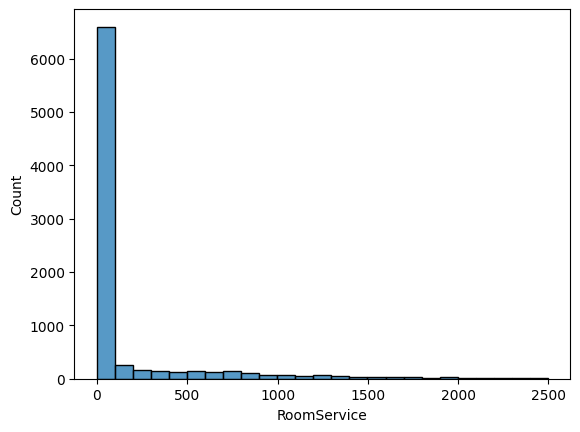

In [15]:
sns.histplot(low_value_roomservice, bins=25)

<Axes: xlabel='RoomService', ylabel='Count'>

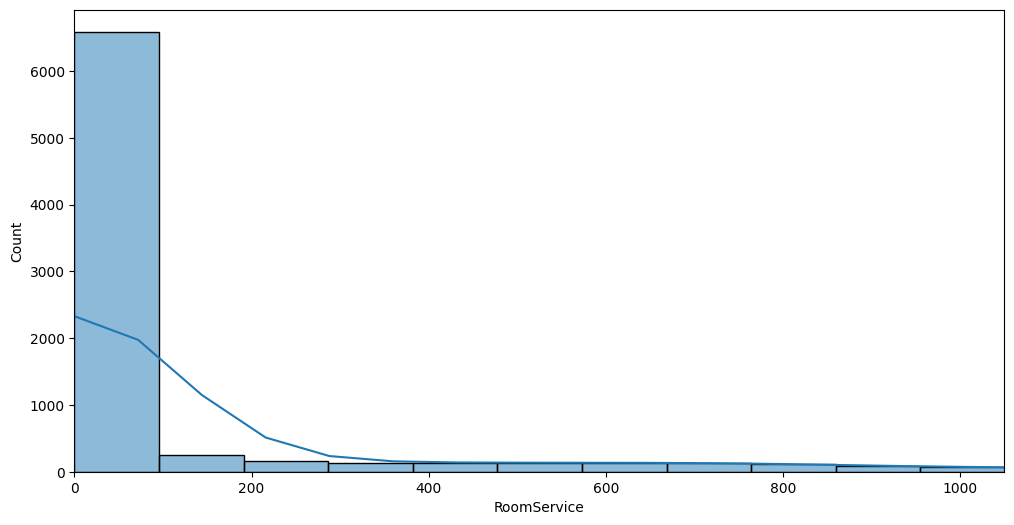

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlim(0,1050)

sns.histplot(room_service, bins=150, ax=ax, kde=True)

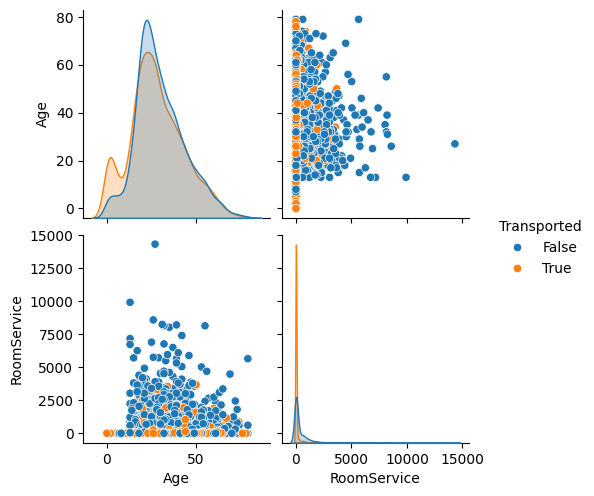

In [9]:
sns.pairplot(train_data[['Age', 'RoomService', 'Transported']], hue='Transported')

# Pico de niños que fueron transportados, y otro pico en torno a 40 años.

# Los que han sido transportados tienen un comportamiento de gasto similar

# Se ha ido hacia 15,000 en el eje de la X porque alguien se ha gastado mucho.

# Seria mas interesante en la cuarta grafica, hacer zoom de 0 a 15,000. 

We can see there is no attribute for which the missing values are more than 5% of the total slots. Thus, we decide to not drop any attribute for now.



# Feature Engineering

An interesting thing to observe is that the 'Cabin' feature is made of 3 distinct components divided by a slash:
- the deck where the cabin was
- the number of the cabin 
- the side where the cabin was

That's why I chose to divide this feature into 3 separate features.

In [17]:
train_data[['Deck', 'Cabin_number', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Cabin_number', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

We want to see how many unique values the newly created features have, proceeding the same as before.

In [15]:
train_data['Cabin_number'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_number, Length: 1817, dtype: int64

In [16]:
train_data['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [17]:
train_data['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

I decided to delete the 'Cabin_number' for simplicity. This way the cabin of each passenger is described as being located in a larger area.

In [18]:
train_data = train_data.drop(['Cabin_number'], axis = 1)
test_data = test_data.drop(['Cabin_number'], axis = 1)

Because we divided the 'Cabin' feature into 3 different features, we are going to exclude it from our data. Also, we are going to delete the 'PassengerId' and 'Name' for simplicity (an idea for future analysis would be to group passengers by their family name). For this I used the **drop** function. For more information about all the parameters of this function please check out the official documentation.

In [19]:
train_data.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)
test_data.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)

We are going to stick with the features that we have now. 

The next step is to fill in all the missing values of each attribute.

# Sidebar

There are two types of attributes present in our dataset:
- **numerical attributes** which refer to numerical datatypes (for example 'Spa' is a numerical attribute, because all of its elements are numbers 
- **categorical attributes** which refer to string datatypes (for example 'HomePlanet' is a categorical attribute, because all of its elements are strings 

The problem is that machines cannot interpret categorical data directly. That is why categorical data must be transformed into numerical data for further processing. 

# End of Sidebar

We observe that two attributes take just True or False as values. This is why I chose to replace the boolean values with numerical ones (1 and 0).

I used the **astype** function to make the conversion. This function casts an object to a specified data type. In our case, we set the parameter dtype = int to make the conversion from bool to int.

Before applying astype we had to fill in the missing values and we did so by using the **fillna** function. We replaced the missing values with 0 because there were more False values for both attributes.

In [20]:
# First, fill the missing values with the value 0
train_data[['VIP', 'CryoSleep']] = train_data[['VIP', 'CryoSleep']].fillna(value=0)
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

# Then change the boolean values with numerical values
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)

test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)

I am going to use two different techniques for filling in the missing values of the numerical and categorical attributes. For the numerical attributes I am going to use the median and for the categorical ones I am going to use the mode. This can be easily done by using the **median** and the **mode** function. However, the mode function returns a Series so I had to use the iloc function to get the actual value of the mode.

In [21]:
# Here I created two lists that contain the names of the numerical and categorical attributes
num_features = [col for col in train_data.columns if train_data[col].dtype == "int64" or train_data[col].dtype == "float64"]
cat_features = [col for col in train_data.columns if train_data[col].dtype == "object"]

for feature in num_features:
  train_data[feature].fillna(train_data[feature].median(), inplace = True)
  test_data[feature].fillna(test_data[feature].median(), inplace = True)

for feature in cat_features:
  train_data[feature].fillna(train_data[feature].mode().iloc[0], inplace = True)
  test_data[feature].fillna(test_data[feature].mode().iloc[0], inplace = True)

In [18]:
train_data.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_number    199
Side            199
dtype: int64

In [22]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S


We verify again for missing values and we see that there are none.

In [23]:
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [24]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S


There are many ways to convert categorical data into numerical data. For this problem I used both ordinal and one-hot encoding.

Ordinal encoding refers to assigning an integer to each category of an attribute. I used it for converting the 'Deck' feature, because the decks are placed in an alphabetical order. I applied it by using the **replace** function which changed each element in the attribute following the map provided.

In [25]:
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
train_data["Deck"] = train_data["Deck"].replace(deck_mapping)
test_data["Deck"] = test_data["Deck"].replace(deck_mapping)

In one-hot encoding the categorical feature is removed and multiple columns with binary values (one for each category) are added to the DataFrame. For example, take the feature 'HomePlanet'. There are three categories for this attribute: Earth, Europa and Mars. After applying one-hot encoding the attribute 'HomePlanet' will be erased from the dataset and three other attributes are created: 'HomePlanet_Earth', 'HomePlanet_Europa' and 'HomePlanet_Mars'. If Passenger1 is from Earth then she will get a 1 in the 'HomePlanet_Earth' column and a 0 in the other two.

I did this by using the **get_dummies** function. 

In [26]:
train_data = pd.get_dummies(train_data).copy()
test_data = pd.get_dummies(test_data).copy()

In [27]:
train_data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,2,0,1,0,0,0,1,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,6,1,0,0,0,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,1,0,1,0,0,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,1,0,0,0,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,6,1,0,0,0,0,1,0,1


# Model

Before fitting any model to our data, we have to make sure that we have a way to test the accuracy of each model. That's why we are going to train the model with 80% of our data and then test it with the rest. Scikit Learn has a specialized function called **train_test_split** that does just that. For a detailed explanation about the parameters of this function please check out the official documentation.

In [28]:
from sklearn.model_selection import train_test_split

# We create a separate variable that contains the labels and then erase them from our data
y = train_data.Transported.copy()
train_data = train_data.drop(['Transported'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


For computing the prediction accuracy of each model I used the scikit learn function **accuracy_score**.

In [29]:
from sklearn.metrics import accuracy_score

Scikit Learn provides many machine learning models that are useful depending on the problem that you're trying to solve. Here I explored just five models to give you the gist of it but feel free to experiment with other models as well. I am not going to explain how each model creates the prediction, because this is beyond the scope of this notebook. However, I am going to explain the structure that I used here. 

First, I created a variable that contains the model and fitted it to the training data. I used the function **fit** for this. Then I made the prediction for the testing data using **predict** function. Finally, I computed the accuracy of the prediction. 

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(svm_pred, y_test)

svc_accuracy

0.7855089131684876

In [31]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_accuracy = accuracy_score(sgd_pred, y_test)

sgd_accuracy

0.6883266244968372

In [32]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(decision_tree_pred, y_test)

decision_tree_accuracy

0.7343300747556066

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(random_forest_pred, y_test)

random_forest_accuracy

0.7929844738355377

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(gbc_pred, y_test)

gbc_accuracy

0.78953421506613

Here is a piece of code that provides us with a DataFrame with the names of all the models and their performance.

In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Stochastic Gradient Decent', 'Decision Tree','Random Forest',
              'GradientBoostingClassifier'],
    'Accuracy': [svc_accuracy, sgd_accuracy, decision_tree_accuracy, random_forest_accuracy, gbc_accuracy]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,0.792984
4,GradientBoostingClassifier,0.789534
0,Support Vector Machines,0.785509
2,Decision Tree,0.734330
1,Stochastic Gradient Decent,0.688327


I made the final prediction for the competition using the model that performed the best: GradientBoostingClassifier.

In [36]:
pred = gbc.predict(test_data)

We organize our data in order to make a submission.

In [37]:
submission_data = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission_data['Transported'] = pred.astype("bool")
submission_data.to_csv("submission.csv",index=False)
submission_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
